# **TTI109 - Estatística**
# **Aula 14 - Intervalos de Confiança 02**

Nessa aula vamos aprender a:

* Empregar a distribuição $\chi^2$ para a determinação de intervalos de confiança para a variância e o desvio padrão;
* Construir um intervalo de confiança para a variância e o desvio padrão populacionais.

# A Distribuição Chi-Quadrado ($\chi^2$)
Se a variável aleatória $x$ tem uma distribuição normal com desvio padrão $\sigma$, então

$$\chi^2=\frac{(n-1)s^2}{\sigma^2}$$


resulta em uma distribuição chi-quadrado com $n – 1$ graus de liberdade, para amostras de qualquer tamanho $n > 1$.

No Python, usaremos o método `pdf` *(probability density function)* da classe `stats.chi2` (biblioteca `scipy`).

## Plotando distribuições $\chi^2$ em função dos graus de liberdade

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
# Geração da lista de graus de liberdade para a visualização (de 3 a 19)
gl = list(range(3, 21, 2))

# Geração de QUANT pontos no intervalo entre INICIO e FIM
N_PTS, INICIO, FIM = 750, 0, max(gl)*2

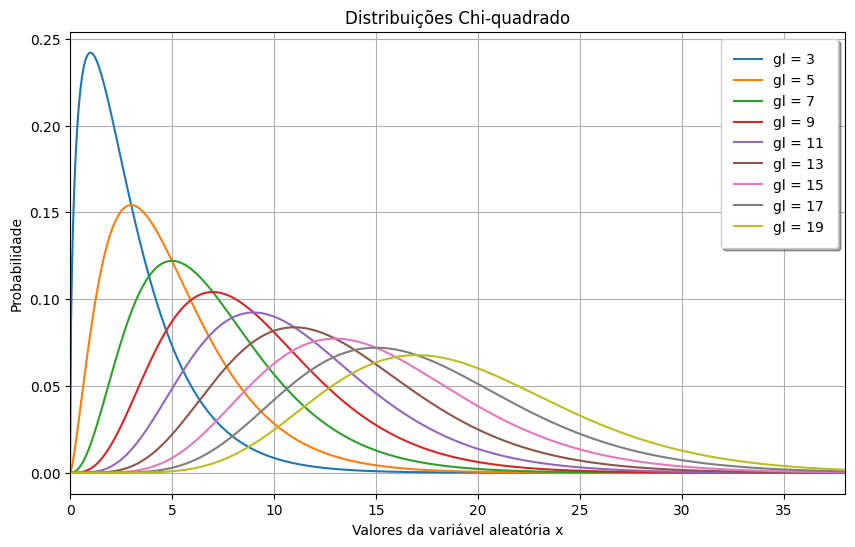

In [4]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Plotagem dos gráficos
for grau in gl:
  # Determinação da distribuição chi-quadrado, com o correspondente gl
  chiquad = st.chi2(df=grau)
  # Valores da variável aleatória x
  x = np.linspace(INICIO, FIM, N_PTS)
  # Determinação da função densidade de probabilidade
  y = chiquad.pdf(x)
  # Plotagem do gráfico
  plt.plot(x, y, label='gl = '+ str(grau))

# Atributos do gráfico
plt.legend(frameon=True, fancybox=True, framealpha=1,
           shadow=True, borderpad=1)
plt.xlim(0, max(gl)*2)
plt.title('Distribuições Chi-quadrado')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

Note que a distribuição $\chi^2$ é diferente para cada número de graus de liberdade. Conforme aumentam, a distribuição $\chi^2$ se aproxima de uma distribuição normal.

## Exercício 01
Encontre os valores críticos $\chi^2_R$
e $\chi^2_L$ para um intervalo de confiança
de $95\%$ quando o tamanho da amostra é 18.

In [5]:
# Criação da distribuição chi-quadrado com 17 grau de liberdade
AMOSTRAS = 18
distchi2 = st.chi2(df=AMOSTRAS-1)

# Nível de confiança
confianca = 0.95

In [6]:
# Determinação dos valores críticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)

# Exibição dos valores
print('***** Distribuição Chi-Quadrado *****')
print(f'--> {AMOSTRAS-1} graus de liberdade')
print(f'Valor crítico à esquerda = {x2L:.3f}')
print(f'Valor crítico à direita = {x2R:.3f}')

***** Distribuição Chi-Quadrado *****
--> 17 graus de liberdade
Valor crítico à esquerda = 7.564
Valor crítico à direita = 30.191


## Exercício 02
Encontre os valores críticos $\chi^2_R$
e $\chi^2_L$ para um intervalo de confiança
de $95\%$ quando o tamanho da amostra é 10. Plote a correspondente distribuição em conjunto com os valores críticos.

In [16]:
# Criação da distribuição chi-quadrado com 17 grau de liberdade
AMOSTRAS = 10
gl = AMOSTRAS-1
distchi2 = st.chi2(df=gl)

# Nível de confiança
confianca = 0.95

In [17]:
# Determinação dos valores críticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)

# Exibição dos valores
print('***** Distribuição Chi-Quadrado *****')
print(f'--> {gl} graus de liberdade')
print(f'Valor crítico à esquerda = {x2L:.3f}')
print(f'Valor crítico à direita = {x2R:.3f}')

***** Distribuição Chi-Quadrado *****
--> 9 graus de liberdade
Valor crítico à esquerda = 2.700
Valor crítico à direita = 19.023


In [9]:
# Construção da distribuição
x = np.linspace(-1, 28, 1000)
y = st.chi2.pdf(x, gl, loc=0, scale=1)

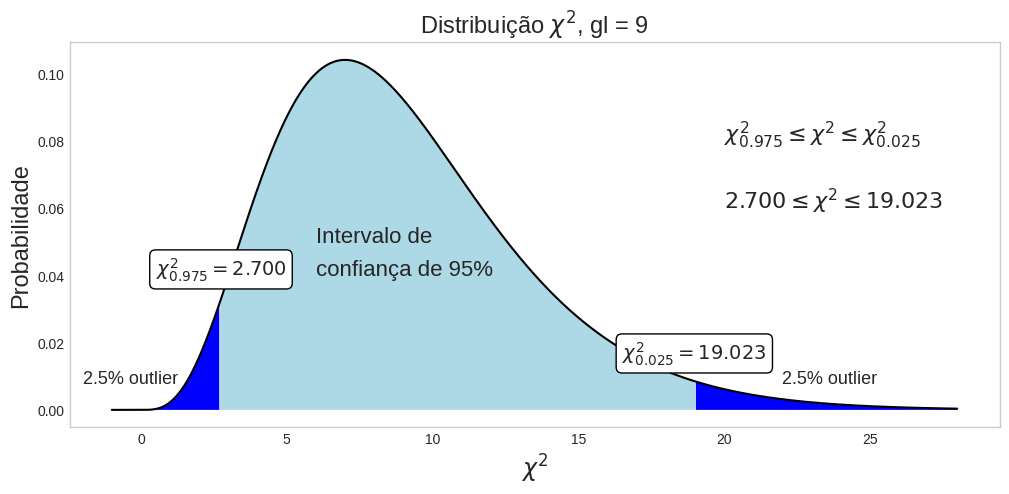

In [28]:
# Estilo do gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 5))

# Plotagem da curva e configurações de eixos
ax.plot(x, y, c='black', label='Graus de liberdade = %d' % gl)
ax.set_xlabel('$\chi^2$', fontsize=17)
ax.set_ylabel(r'Probabilidade', fontsize=17)
ax.set_title(r'Distribuição $\chi^2$, gl = %d' % gl, fontsize=17)

# Regiões de sombreamento
ax.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= x2L), facecolor='blue')
ax.fill_between(x, 0, y, where=(np.array(x) > x2L) & (np.array(x) < x2R), facecolor='lightblue')
ax.fill_between(x, 0, y, where=(np.array(x) > x2R) & (np.array(x) <= max(x)), facecolor='blue')
ax.grid(False)

# Textos
ax.text(22, 0.008, '2.5% outlier', fontsize=13)
ax.text(-2, 0.008, '2.5% outlier', fontsize=13)
ax.text(0.5, 0.04, '$\chi^2_{0.975} = %.3f$' % x2L, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(16.5, 0.015, '$\chi^2_{0.025} = %.3f$' % x2R, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(20, 0.08, '$\chi^2_{0.975} \leq \chi^2 \leq \chi^2_{0.025}$', fontsize=16)
ax.text(20, 0.06, '$2.700 \leq \chi^2 \leq 19.023$', fontsize=16)
ax.text(6, 0.05, 'Intervalo de', fontsize=16)
ax.text(6, 0.04, 'confiança de 95%', fontsize=16)
plt.show()

# Intervalos de Confiança para $\sigma^2$ e $\sigma$

Infelizmente, não existe uma biblioteca `Python` que calcule o intervalo de confiança para variância. O fato de que uma função pré-construída não exista sugere que o intervalo de confiança para a variância (e desvio padrão) raramente é usado.

No entanto, o conceito do intervalo de confiança para a variância forma a base do *Teste-f*, um teste de hipótese estatística amplamente utilizado em artigos científicos.

O intervalo de confiança para a variância pode ser calculada como visto a seguir. Não se esqueça de calcular a variância da amostra, em vez da variância populacional, definindo `ddof=1`.



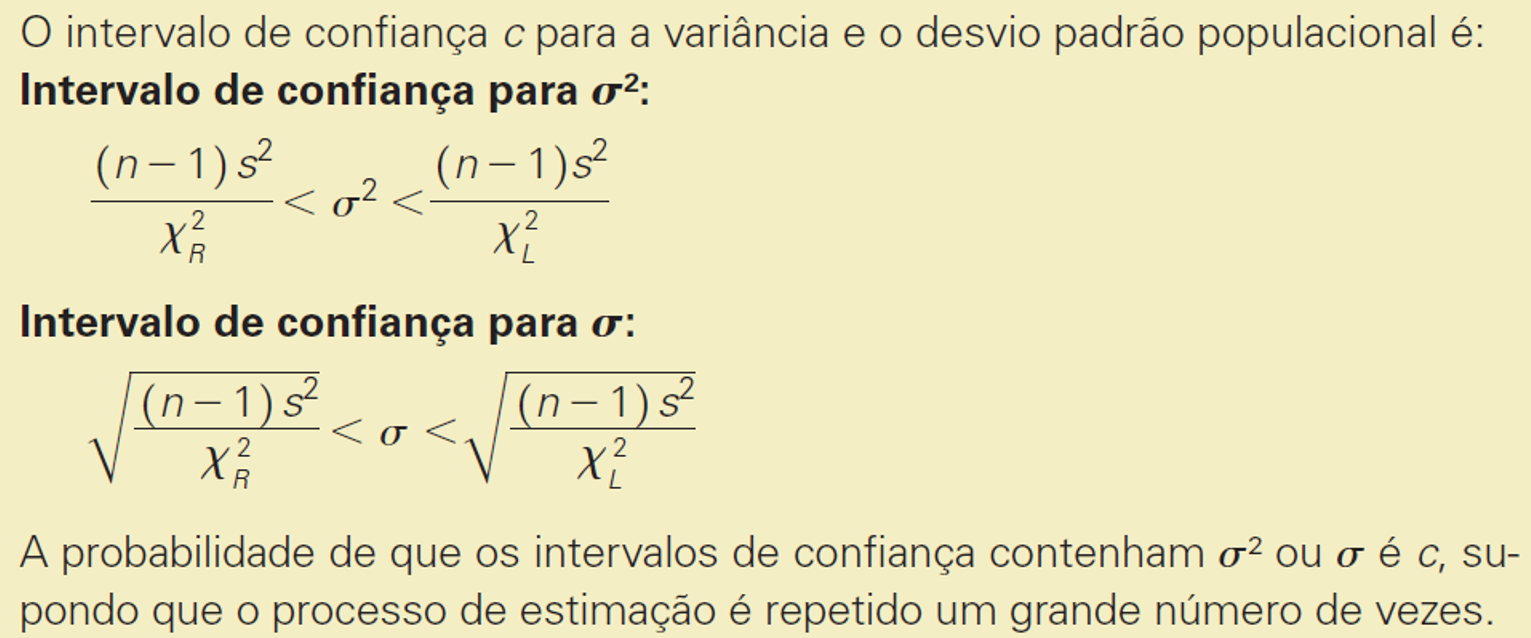

Desse modo, vamos construir nossa própria função para a determinação do intervalo de confiança para a variância e o desvio padrão.

In [30]:
# Função para o cálculo do IC da variância e desvio padrão

def IC_variancia(amostras, s_amostral, confianca=0.95):
  '''Função para o cálculo do intervalo de confiança para a
  variância populacional.
  ENTRADA:
  - amostras: número de amostras examinadas no experimento
  - s_amostral: desvio padrão amostral
  - confianca: nível de confiança adotado (valor default 0.95)
  SAÍDA:
  - IC no formato tupla'''

  from scipy import stats as st

  # Distribuição chi-quadrado
  distchi2 = st.chi2(df=amostras-1)

  # Determinação dos valores críticos
  x2L = distchi2.ppf((1-confianca)/2)
  x2R = distchi2.ppf((1+confianca)/2)

  # Extremos do IC para variância
  inf = (amostras-1)*s_amostral**2/x2R
  sup = (amostras-1)*s_amostral**2/x2L
  return (inf, sup)

## Exercício 03

Você seleciona aleatoriamente e pesa as 30 unidades de uma amostra de um antialérgico. O desvio padrão da amostra é de 1,20 miligrama. Supondo que os pesos são normalmente distribuídos, construa intervalos de confiança de 90% e 95% para a variância e o desvio padrão da população de pesos dos remédios.

In [31]:
# Intervalos de confiança
amostras, confianca, desvpad = 30, [0.95, 0.90], 1.20

# Lista de intervalos de confiança
ICsigma2 = [IC_variancia(amostras, desvpad, conf) for conf in confianca]

# Exibição dos IC para variância e desvio padrão
for i in range(len(confianca)):
  print(f'- Nível de confiança de {confianca[i]*100}%:')
  print(f'Variância: ({ICsigma2[i][0]:.3f}, {ICsigma2[i][1]:.3f}) mg^2')
  print(f'Desvio Padrão: ({ICsigma2[i][0]**0.5:.3f}, {ICsigma2[i][1]**0.5:.3f}) mg')

- Nível de confiança de 95.0%:
Variância: (0.913, 2.602) mg^2
Desvio Padrão: (0.956, 1.613) mg
- Nível de confiança de 90.0%:
Variância: (0.981, 2.358) mg^2
Desvio Padrão: (0.991, 1.536) mg


## Exercício 04

O puma é um dos mamíferos mais ameaçados da Terra. No sudeste dos Estados Unidos, a única população reprodutora (cerca de 100 indivíduos) pode ser encontrada no extremo sul da Flórida. A maioria dos pumas vive em:

1.   The Big Cypress National Preserve
2.   Everglades National Park
3.   The Florida Panther National Wildlife Refuge,

conforme o mapa na figura a seguir.

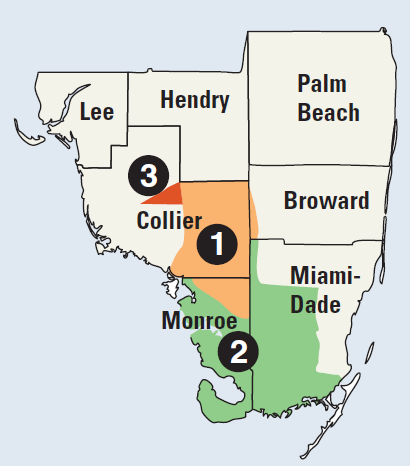

Em um estudo recente com 12 fêmeas da espécie, foi descoberto que o tamanho médio da ninhada era de 2,4 filhotes, com um desvio padrão de 0,9 (Fonte: *U.S. Fish & Wildlife Service*).

Construa um intervalo de confiança de 90% para o desvio
padrão do tamanho da ninhada das fêmeas do puma na Flórida. Suponha que os tamanhos das ninhadas são normalmente distribuídos.



In [32]:
# Caracterização da amostra
amostras = 12
confianca = 0.9
desv_pad = 0.9

# Uso da função para cálculo de IC para a variância
ICsigma2 = IC_variancia(amostras, desv_pad, confianca)

# Cálculo do IC para o desvio padrão
print(f'IC para o desvio padrão, confiança de {confianca*100}%:')
print(f'({ICsigma2[0]**0.5:.3f}, {ICsigma2[1]**0.5:.3f}) filhotes')

IC para o desvio padrão, confiança de 90.0%:
(0.673, 1.396) filhotes


# Exercício 05

Vamos voltar aos dados sobre os hábitos de sono das crianças. Na aula passada, nosso objetivo foi analisar a hora de dormir de crianças que cochilam e não cochilam durante o dia.

Agora, queremos construir intervalos de confiança para o desvio padrão da hora de dormir.

In [33]:
# Download do conjunto de dados - arquivo nap_no_nap.csv
%%capture
!gdown --id 1Bh723j4WHb9_Mn7W6npYccn302HIlrTJ

In [35]:
import pandas as pd

# Dados armazenados no DataFrame soneca
soneca = pd.read_csv('nap_no_nap.csv', encoding='utf-8')
soneca.sample(10)

,id,sex,age (months),dlmo time,days napped,napping,nap lights outl time,nap sleep onset,nap midsleep,nap sleep offset,...,sleep onset latency,night midsleep time,night wake time,night sleep duration,night time in bed,24 h sleep duration,bedtime phase difference,sleep onset phase difference,midsleep phase difference,wake time phase difference
17,18,male,36.4,20.16,5,1,12.47,12.56,13.30,14.05,...,0.43,1.23,6.01,573.60,614.60,663.40,0.14,-0.29,5.07,9.85
1,2,female,31.5,18.27,0,0,NaN,NaN,NaN,NaN,...,0.25,1.09,6.69,672.40,700.40,672.40,-0.96,-1.21,6.82,12.42
10,11,male,32.9,18.79,4,1,13.99,14.03,14.85,15.68,...,0.44,1.34,6.80,655.20,694.80,753.95,-0.66,-1.09,6.55,12.01
2,3,male,31.9,19.14,0,0,NaN,NaN,NaN,NaN,...,0.45,1.29,6.53,628.80,682.60,628.80,-0.46,-0.91,6.15,11.39
7,8,male,30.0,21.06,5,1,13.09,13.43,14.44,15.46,...,0.51,2.92,7.31,526.80,582.40,648.40,-0.95,-1.47,5.86,10.25
3,4,female,31.6,19.69,0,0,NaN,NaN,NaN,NaN,...,0.05,1.89,8.28,766.60,784.00,766.60,0.23,0.19,6.20,12.59
8,9,male,33.2,19.38,2,1,14.41,14.42,15.71,17.01,...,0.13,1.60,6.82,626.80,660.33,782.30,-0.86,-0.99,6.22,11.44
0,1,female,33.7,19.24,0,0,NaN,NaN,NaN,NaN,...,0.23,1.92,7.17,629.40,643.00,629.40,-1.21,-1.44,6.68,11.93
18,19,female,33.6,19.68,3,1,14.71,14.85,15.46,16.07,...,0.14,1.42,7.20,693.40,715.00,766.40,0.18,0.04,5.74,11.52
15,16,male,36.5,20.25,3,1,13.74,14.68,15.66,16.64,...,0.79,2.19,7.13,593.25,662.00,710.58,-0.21,-1.00,5.94,10.88


In [36]:
# Isolando as colunas de análise
hora_dormir_cochila = soneca['night bedtime'].loc[soneca['napping'] == 1]
hora_dormir_nao_cochila = soneca['night bedtime'].loc[soneca['napping'] == 0]

In [37]:
# Determinando os desvios padrão amostrais
cochila_hora_dormir_std = hora_dormir_cochila.std(ddof=1)
nao_cochila_hora_dormir_std = hora_dormir_nao_cochila.std(ddof=1)

In [38]:
# Calculando os intervalos de confiança de 95% para a variância
IC_cochila = IC_variancia(len(hora_dormir_cochila), cochila_hora_dormir_std)
IC_nao_cochila = IC_variancia(len(hora_dormir_nao_cochila), nao_cochila_hora_dormir_std)

In [40]:
# Mostrando os intervalos para o desvio padrão
print('*** Intervalo de confiança para o desvio padrão populacional - Hora de dormir***')
print('--> Nível de confiança de 95%')
print(f'--> Crianças que cochilam = ({IC_cochila[0]**0.5:.2f}, {IC_cochila[1]**0.5:.2f})')
print(f'--> Crianças que não cochilam = ({IC_nao_cochila[0]**0.5:.2f}, {IC_nao_cochila[1]**0.5:.2f})')

*** Intervalo de confiança para o desvio padrão populacional - Hora de dormir***
--> Nível de confiança de 95%
--> Crianças que cochilam = (0.43, 0.93)
--> Crianças que não cochilam = (0.30, 1.46)
